# World Happiness Report 2023

In [112]:
import csv
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

### Use pandas to read csv file, and create a DataFrame

In [113]:
data = pd.read_csv('whr.csv')

### Query which columns have missing values

In [114]:
print(data.isnull().sum())

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64


### Check for duplicated rows

In [115]:
duplicated_rows = data[data.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

Duplicated Rows:
Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []


In [116]:
sns.set(style="dark")

### Select some countries to compare

In [117]:
selected_countries = ['Afghanistan', 'France', 'Nigeria', 'Singapore', 'Syria','United Kingdom', 'Norway']

### Remove nulls from y-column values

In [118]:
data_cleaned = data.dropna(subset = 'Perceptions of corruption')

In [119]:
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]

### Scatterplot using multiple values (years) for each country

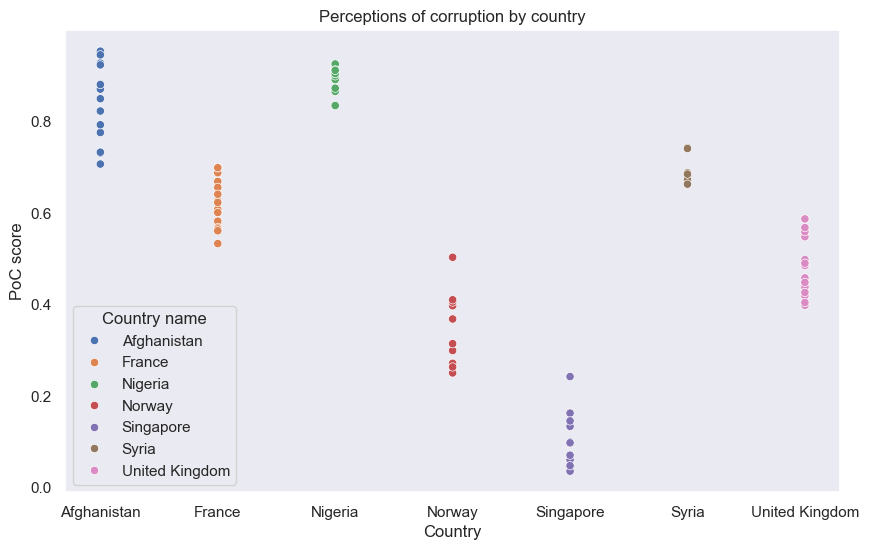

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country name', y='Perceptions of corruption', hue='Country name', data=filtered_data)
plt.title('Perceptions of corruption by country')
plt.xlabel('Country')
plt.ylabel('PoC score')
plt.show()

### Using two variables with data averaged by country, and including a linear regression

In [121]:
data_cleaned = data.dropna(subset = 'Healthy life expectancy at birth')
selected_countries = ['Bangladesh','Benin', 'Canada', 'Japan', 'Nepal', 'Poland', 'Iraq', 'Switzerland', 'Spain', 'Venezuela']
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]
mean_data = filtered_data.groupby('Country name').mean().reset_index()

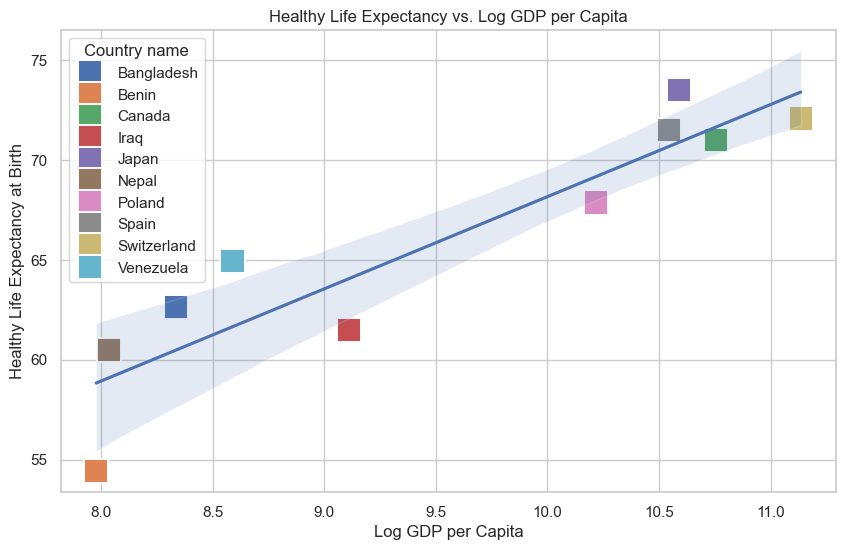

In [122]:
sns.set(style="whitegrid")
# Visualization code with blobs for each column
plt.figure(figsize=(10, 6))
# Scatter plot
sns.scatterplot(x='Log GDP per capita', y='Healthy life expectancy at birth', hue='Country name', data=mean_data, marker='s', s=300)
sns.regplot(x='Log GDP per capita', y='Healthy life expectancy at birth', data=mean_data, scatter=False)
plt.title('Healthy Life Expectancy vs. Log GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Healthy Life Expectancy at Birth')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

### Using all rows to plot a heatmap

In [123]:
data_cleaned = data.dropna(subset=['Freedom to make life choices', 'Log GDP per capita'])

In [ ]:
sns.set(style="whitegrid")
sns.set(font_scale=3)
p=sns.jointplot(x=data_cleaned['Log GDP per capita'], y=data_cleaned['Freedom to make life choices'], height=16, kind='kde', cmap='coolwarm', fill=True).set_axis_labels('Log GDP per Capita', 'Freedom to Make Life Choices')
plt.title("Affluence against freedom", fontsize=50)
plt.subplots_adjust(top=1.4)
plt.subplots_adjust(right=2)
plt.show()

### Non-linear regression showing life ladder against wealth

In [ ]:
data_cleaned = data.dropna(subset = ['Life Ladder', 'Log GDP per capita'])
mean_data = data_cleaned.groupby('Country name').mean().reset_index()
print(type(mean_data))

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x=round(mean_data['Log GDP per capita'], 2), y=mean_data['Life Ladder'], bins = 100, palette='bright', hue=mean_data['Country name'], legend=None)
sns.regplot(x='Log GDP per capita', y='Life Ladder', data=mean_data, scatter=False, order=2)
plt.xlabel('LogGDP', fontsize=13)
plt.ylabel('Life Ladder', fontsize=13)
plt.title('Life ladder against Log GDP per capita', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

#### Change Country name for 'United Arab Emirates' to 'UAE'

In [ ]:
data_cleaned = data.dropna(subset = ['Log GDP per capita'])
selected_countries = ['Azerbaijan','Brazil', 'Egypt', 'Guatemala', 'Jamaica', 'Mexico', 'Netherlands', 'Peru', 'Russia', 'Slovakia', 'Thailand', 'United Arab Emirates']
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]
# Check if 'United Arab Emirates' exists in the 'Country name' column
if 'United Arab Emirates' in filtered_data['Country name'].values:
    # Replace 'United Arab Emirates' with 'UAE' using .loc
    filtered_data.loc[filtered_data['Country name'] == 'United Arab Emirates', 'Country name'] = 'UAE'
mean_data = filtered_data.groupby('Country name').mean().reset_index()

### Using a plot to demonstrate apparently random correlation between wealth and generosity

In [ ]:
data_cleaned = data.dropna(subset = ['Log GDP per capita'])
selected_countries = ['Azerbaijan','Brazil', 'Egypt', 'Guatemala', 'Jamaica', 'Mexico', 'Netherlands', 'Peru', 'Russia', 'Slovakia', 'Thailand', 'United Arab Emirates']
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]
# Check if 'United Arab Emirates' exists in the 'Country name' column
if 'United Arab Emirates' in filtered_data['Country name'].values:
    # Replace 'United Arab Emirates' with 'UAE' using .loc
    filtered_data.loc[filtered_data['Country name'] == 'United Arab Emirates', 'Country name'] = 'UAE'
mean_data = filtered_data.groupby('Country name').mean().reset_index()
plt.figure(figsize=(10, 8))
sns.scatterplot(x=mean_data['Generosity'], y=mean_data['Log GDP per capita'], palette='bright', hue=mean_data['Country name'], marker='s', s=150)


# Set labels and title
plt.xlabel('Generosity', fontsize=13)
plt.ylabel('Log GDP per capita', fontsize=13)
plt.title('GDP against Generosity', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)

plt.show()

### 

### Violinplot showing spread of life ladder across whole dataset

In [ ]:
data_cleaned = data.dropna(subset = ['Life Ladder'])
mean_data = data_cleaned.groupby('Country name').mean().reset_index()
sns.set(font_scale=1)
sns.violinplot(x=mean_data['Life Ladder'], color = 'purple')


### Life expectancy across a selection of countries

In [ ]:
colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#fff030', '#65491e', '#0038b8', '#F85888', '#98D8D8', '#FFCCCB']
selected_countries = ['Bhutan','Belgium', 'Cambodia', 'Hungary', 'Somalia', 'Israel', 'Iran', 'Australia', 'Portugal', 'Morocco']
filtered_data = data_cleaned[data_cleaned['Country name'].isin(selected_countries)]
plt.figure(figsize=(14, 9))
ax = sns.violinplot(hue=filtered_data['Country name'], y=filtered_data['Healthy life expectancy at birth'], palette=colors_list)
ax.set_title("Healthy life expectancy at birth", fontsize=16)
ax.set_ylabel("Life Expectancy", fontsize=14)
ax.set_xlabel("Country", fontsize=14)
plt.show()

### Ridgeplot showing life ladder by country

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(filtered_data, row="Country name", palette=palette, hue="Country name", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Life Ladder", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Life Ladder", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "Country name")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], ylabel=None, xlabel="Life Ladder")
g.despine( left=True)
plt.suptitle('Life Ladder by country', y=0.98)

### Imputing missing value for 2022 in Afghanistan data, using scikit-learn

In [ ]:
nan = np.nan
X = np.array([7.35, 7.509, 7.614, 7.581, 7.661, 7.68, 7.671, 7.654, 7.65, 7.648, 7.631, 7.64, 7.324, nan]).reshape(-1,1)
imputer = KNNImputer(n_neighbors=2, weights="uniform")
x_imputed = imputer.fit_transform(X)
# Round the imputed value to three significant figures
imputed_value = round(x_imputed[-1][0], 3)
# Print the imputed value
print("Imputed value for the missing entry (to 3 sig figs):", imputed_value)

### Lineplot with missing 2022 value imputed

In [ ]:
years = np.arange(2009, 2023)
sns.lineplot(x=years, y=x_imputed.flatten())
plt.xlabel('Year')
plt.ylabel('Log GDP per capita')
plt.title('Log GDP per capita by year for Afghanistan')
plt.show()